<a href="https://colab.research.google.com/github/Arunass-hack/Arunass-hack/blob/main/Hacker_earth_project/price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [2]:
df = pd.read_csv("total.csv")

In [3]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [4]:
df.shape

(7418, 10)

In [5]:
df.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [6]:
df.describe()

,timestamp,min_price,max_price,modal_price
count,7.418000e+03,7418.000000,7418.000000,7418.000000
mean,1.523025e+09,2551.547816,2999.163084,2804.140783
std,4.987461e-01,3563.042575,4199.273121,3917.043677
min,1.523025e+09,0.000000,0.000000,0.410000
25%,1.523025e+09,900.000000,1100.000000,1000.000000
50%,1.523025e+09,1650.000000,2000.000000,1828.500000
75%,1.523025e+09,3200.000000,3650.000000,3500.000000
max,1.523025e+09,95000.000000,110000.000000,100000.000000


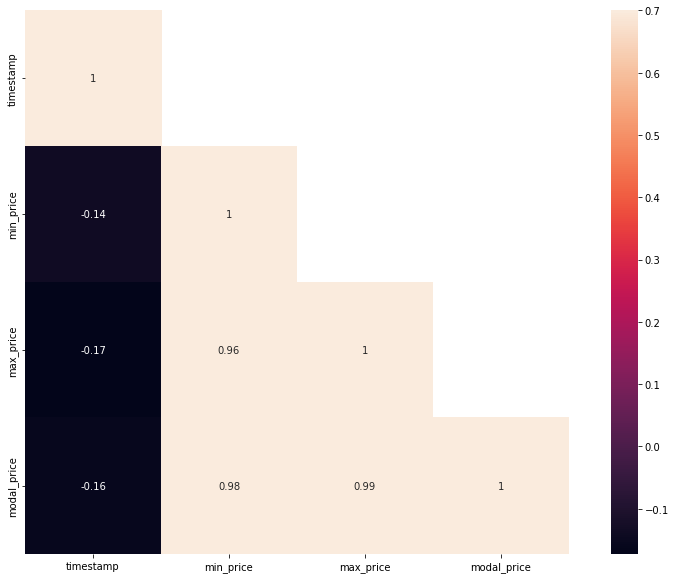

In [7]:
correlation_map = df[df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [8]:
df.state.unique()

array(['Assam', 'Chattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'NCT of Delhi', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [9]:
df.district.unique()

array(['Barpeta', 'Dhemaji', 'Kamrup', 'Nagaon', 'Nalbari', 'Sonitpur',
       'Bastar', 'Bilaspur', 'Durg', 'Janjgir', 'Mahasamund',
       'North Bastar', 'Rajnandgaon', 'Surguja', 'Ahmedabad', 'Amreli',
       'Anand', 'Banaskanth', 'Bharuch', 'Bhavnagar', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Kheda', 'Mehsana', 'Morbi',
       'Panchmahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha',
       'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Valsad', 'Ambala',
       'Bhiwani', 'Faridabad', 'Fatehabad', 'Jind', 'Kaithal', 'Karnal',
       'Kurukshetra', 'Mahendragarh-Narnaul', 'Panchkula', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Bokaro',
       'Dhanbad', 'East Singhbhum', 'Garhwa', 'Giridih', 'Godda', 'Gumla',
       'Koderma', 'Lohardaga', 'Pakur', 'Ranchi', 'Simdega', 'Bagalkot',
       'Bangalore', 'Belgaum', 'Bellary', 'Bidar', 'Bijapur',
       'Chamraj

In [10]:
df.commodity.unique()

array(['Black Gram (Urd Beans)', 'Corriander seed', 'Jute',
       'Lentil(Masur)', 'Mustard', 'Potato', 'Wheat Atta', 'Maida Atta',
       'Green Chilli', 'Green Gram Dal (Moong Dal)', 'Paddy(Dhan)',
       'Bengal Gram(Gram)', 'Lak(Teora)', 'Onion', 'Tomato', 'Tinda',
       'Mahua', 'Bhindi(Ladies Finger)', 'Lemon', 'Maize', 'Bottle gourd',
       'Brinjal', 'Carrot', 'Methi(Leaves)', 'Cotton',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Chili Red',
       'Cummin Seed(Jeera)', 'Jowar(Sorghum)', 'Methi Seeds',
       'Sesamum(Sesame,Gingelly,Til)', 'Wheat', 'Suva (Dill Seed)',
       'Rajgir', 'Soanf', 'Guar Seed(Cluster Beans Seed)',
       'Coriander(Leaves)', 'Ginger(Green)', 'Groundnut',
       'Arhar (Tur/Red Gram)', 'Beans', 'Soyabean', 'Barley (Jau)',
       'Green Gram (Moong)', 'Groundnut (Split)', 'Isabgul (Psyllium)',
       'Kulthi(Horse Gram)', 'Ground Nut Seed', 'Garlic', 'Cluster beans',
       'Cauliflower', 'Cucumbar(Kheera)', 'Pumpkin', 'Apple',
       'Bit

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7418 non-null   int64  
 1   state         7418 non-null   object 
 2   district      7418 non-null   object 
 3   market        7418 non-null   object 
 4   commodity     7418 non-null   object 
 5   variety       7418 non-null   object 
 6   arrival_date  7418 non-null   object 
 7   min_price     7418 non-null   float64
 8   max_price     7418 non-null   float64
 9   modal_price   7418 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.7+ KB


In [12]:
def get_val(state , district , commodity):
    temp = df.loc[(df.state == state) & (df.district == district) & (df.commodity == commodity), : ]
    fig, axes = plt.subplots(6,1)
    fig.set_size_inches(20, 30)
    sns.barplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[0] )
    sns.pointplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[1] )
    #sns.stripplot(x="market", y="min_price", data=temp , jitter=True ,  ax = axes[1])
    #sns.distplot(temp.modal_price , ax = axes[3])
    sns.barplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[2] )
    sns.pointplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[3] )
    sns.barplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[4] )
    sns.pointplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[5] )

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['commodity'] = le.fit_transform(df['commodity'])
df['variety'] = le.fit_transform(df['variety'])

In [14]:
df.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,21,52,06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,50,86,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,93,312,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,102,207,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,125,221,06/04/2018,3550.0,3650.0,3600.0


In [15]:
x=df.iloc[:,[4,5,7,8]]
y=df['modal_price']

In [16]:
x.loc[1692]
y.loc[1692]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_test.loc[1692]

commodity      41.0
variety        78.0
min_price    3000.0
max_price    3800.0
Name: 1692, dtype: float64

In [17]:
alg = LinearRegression()
alg.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.metrics import r2_score
y_predict = alg.predict(X_test)

print(r2_score(y_predict,y_test))
y_predict

0.992368576835764


array([3489.39790971, 6716.12259556, 2191.43022183, ..., 2193.03639206,
       3598.82193142, 4266.78503184])

In [19]:
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

334.53448911167084


In [20]:
x.shape

(7418, 4)

In [21]:
clf = LinearRegression()
scores = cross_val_score(clf, x, y, cv=5, scoring='neg_mean_squared_error')

In [22]:
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

In [23]:
print(scores)

print("\n\nr2_score is " , r2_score(y_predict,y_test))
avg_rmse_phos = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[349.14610144 505.23651023 268.67731891 368.61847971 146.38580753]


r2_score is  0.992368576835764


Avg RMSE is  327.61284356314155


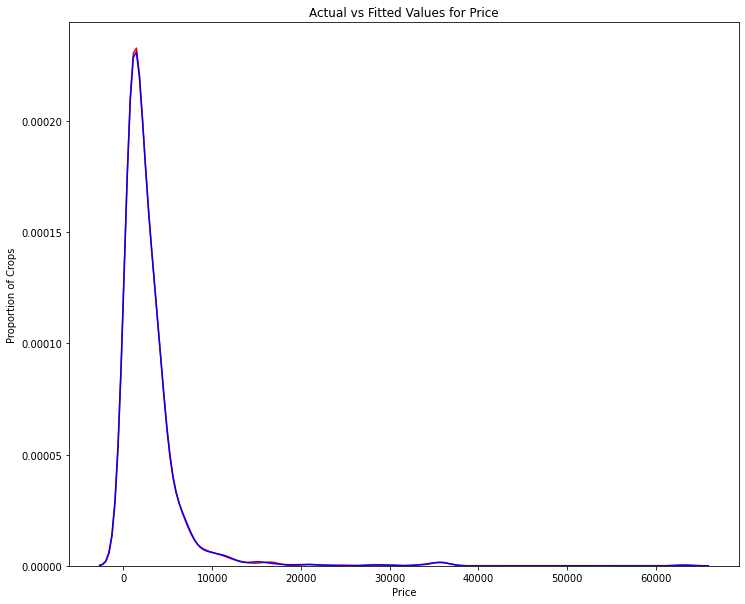

In [24]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Crops')

plt.show()
plt.close()

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict1 = rfr.predict(X_test)
rfr.score(X_test,y_test)

0.99146627302338

In [26]:
y_predict1

array([3487.895, 6752.47 , 2200.7  , ..., 2204.5  , 3523.35 , 4308.34 ])

In [27]:
print("\n\nr2_score is " , r2_score(y_predict1,y_test))



r2_score is  0.9914111887561361


In [28]:
from sklearn import tree

dt=tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
x_predicted=dt.predict(X_test)
r2_score(x_predicted,y_test)

0.9851119942947155

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [30]:
test_vector = np.reshape(np.asarray([1,32,3100.0,3000.0]),(1,4))
p = int(alg.predict(test_vector)[0])
p


3003

In [31]:
test_vector = np.reshape(np.asarray([1,32,3100.0,3000.0]),(1,4))
p = int(dt.predict(test_vector)[0])
p

3050

In [32]:
import pickle
pickle.dump(alg, open("alg.pkl", "wb"))
pickle.dump(rfr, open("rfr.pkl", "wb"))
pickle.dump(dt, open("dt.pkl", "wb"))
print("All Models Saved")

All Models Saved
